# Introduction

Linear regression is a powerful statistical technique widely used across various domains, including real estate, telecommunications, and e-commerce, to build predictive models. In the real estate industry, linear regression can provide valuable insights into property pricing by analyzing the relationship between housing prices and several predictor variables.

In this project, I focus on predicting house prices based on various features of the property. The dataset includes several variables that potentially influence the price of a house, such as the area of the property, the number of bedrooms and bathrooms, the number of stories, and the presence of amenities like parking, air conditioning, and heating systems.

**Problem Statement:**

A real estate company in Delhi aims to optimize the selling price of its properties by considering critical factors such as the area, number of bedrooms, and various amenities. The goal is to develop a multiple linear regression model that can accurately predict property prices based on these factors.

**Dataset Description:**

The dataset contains the following columns:

- **price:** The target variable representing the price of the property.
- **area:** The area of the house or apartment.
- **bedrooms:** The number of bedrooms.
- **bathrooms:** The number of bathrooms.
- **stories:** The number of stories.
- **mainroad:** Whether the property is close to a main road (binary: yes/no).
- **guestroom:** Whether a guestroom is present (binary: yes/no).
- **basement:** Whether a basement is present (binary: yes/no).
- **hotwaterheating:** Whether hot water heating is available (binary: yes/no).
- **airconditioning:** Whether air conditioning is present (binary: yes/no).
- **parking:** Whether parking space is available (binary: yes/no).
- **prefarea:** Whether the property is in a preferred area (binary: yes/no).
- **furnishingstatus:** The furnishing status of the property (categorical: furnished, semi-furnished, unfurnished).

To construct the multiple linear regression model, I will employ the technique of backward selection to systematically identify and retain the most significant predictor variables while excluding less relevant ones. This approach will help in building a robust model that accurately reflects the factors influencing property prices.

# 1: Reading and Understanding the Data

In [121]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

import statsmodels.api as sm

In [123]:
from google.colab import files

uploaded = files.upload()

Saving Housing.csv to Housing (1).csv


In [124]:
housing = pd.read_csv("Housing.csv")

In [125]:
# Checking the head of the dataset
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


Observations :

1. Scaling :Difference in scales between variables like bedrooms, bathrooms and are. Hence, scaling is required.
2. Encoding : There are variables with "yes" / "no" entries, this can be changed to 1 and 0.
3. Dummy Variables - The column "furnishingstatus" has 3 categorical values, this needs creation of dummy variables
4. Target variable - Price is a continuous variable, so building a linear regression model is possible

In [126]:
#checking the shape of the dataset

housing.shape

(545, 13)

In [127]:
#checking for missing values

housing.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [128]:
#checking other information about the dataset

housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [129]:
#checking statistical info, specially the difference in percentiles to look for a pattern or presence of outlier

housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


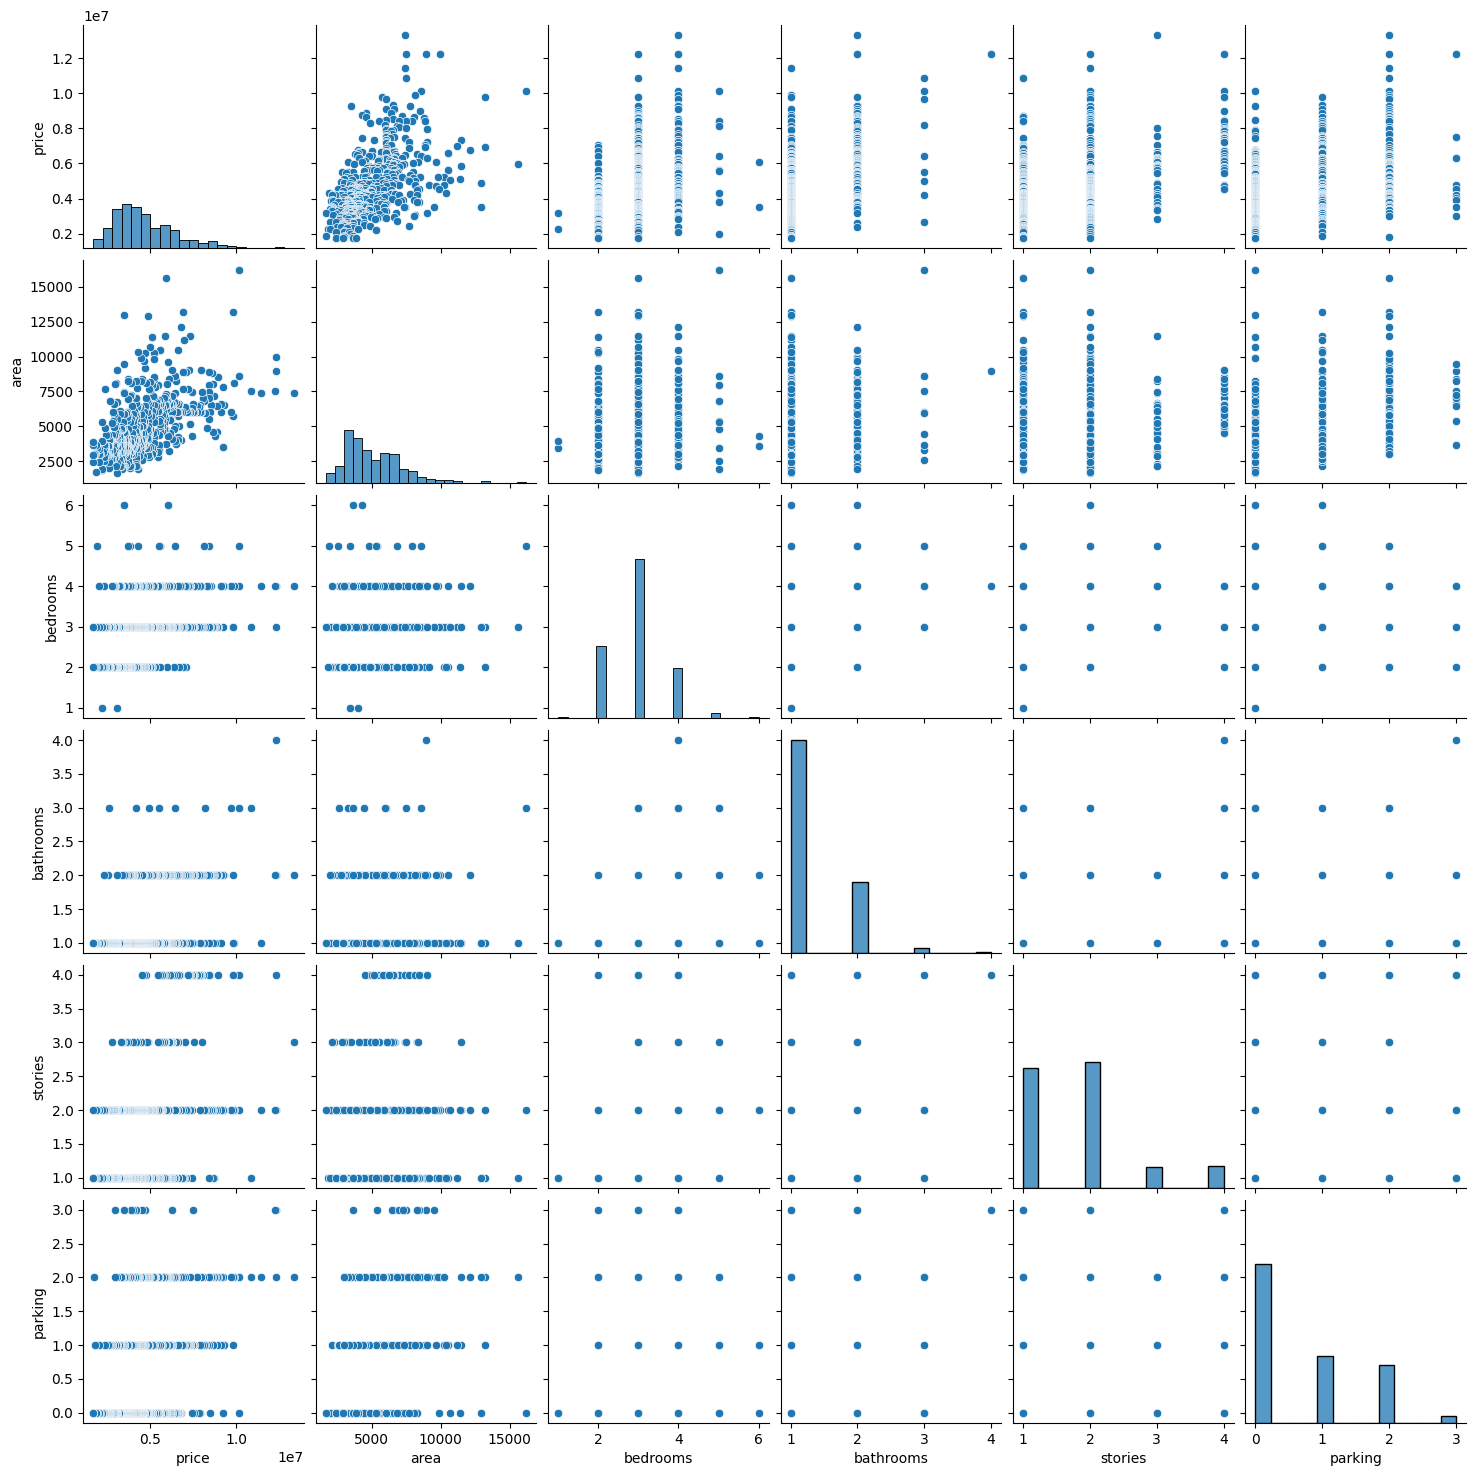

In [130]:
#Visusalising the numerical variables of the dataset

sns.pairplot(housing)
plt.show()

Some sort of linear relationshiop can be drawn

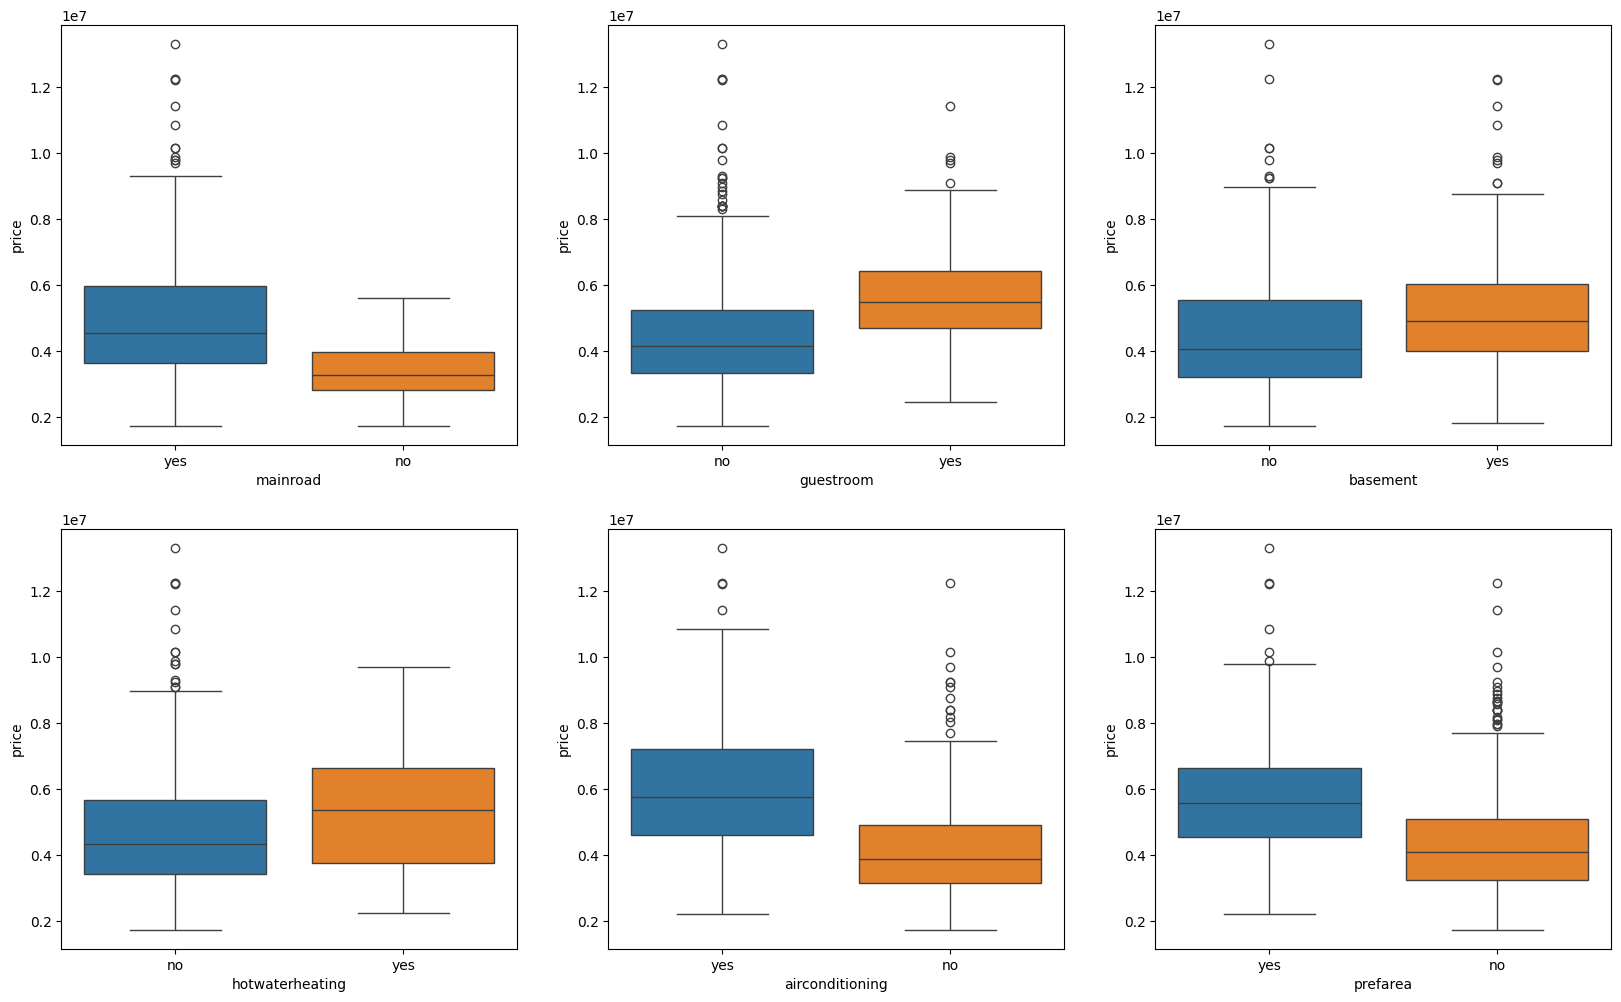

In [131]:
#Visualising the variables with Yes/No values

plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data = housing, hue = 'mainroad')
plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = housing, hue = 'guestroom')
plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price', data = housing, hue = 'basement')
plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = housing, hue = 'hotwaterheating')
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = housing, hue = 'airconditioning')
plt.subplot(2,3,6)
sns.boxplot(x = 'prefarea', y = 'price', data = housing, hue = 'prefarea')
plt.show()

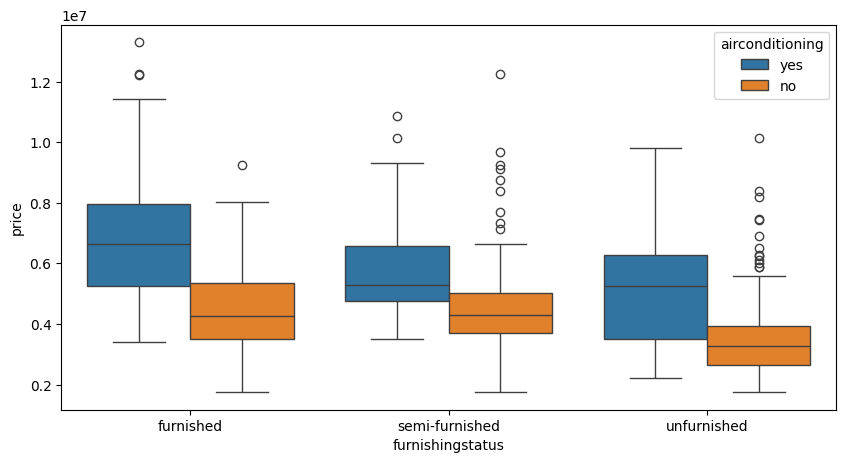

In [132]:
#Visualising the furnishingstatus variable

plt.figure(figsize = (10, 5))
sns.boxplot(x = 'furnishingstatus', y = 'price', hue = 'airconditioning', data = housing)
plt.show()

Qualitative Analysis:

The medians between Yes and No plots are far different - there is some sort of impact present here.

# Data Preparation

## 1. Encoding Binary Variables

In [133]:
# List of variables to map

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

housing[varlist].head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,yes,no,no,no,yes,yes
1,yes,no,no,no,yes,no
2,yes,no,yes,no,no,yes
3,yes,no,yes,no,yes,yes
4,yes,yes,yes,no,yes,no


In [134]:
#mapping

housing[varlist] = housing[varlist].apply(lambda x: x.map({'yes': 1, 'no': 0}))
housing[varlist].head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,1,0,0,0,1,1
1,1,0,0,0,1,0
2,1,0,1,0,0,1
3,1,0,1,0,1,1
4,1,1,1,0,1,0


In [135]:
#checking the dataset

housing.head(15)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,semi-furnished
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,semi-furnished
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,unfurnished
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,furnished
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,unfurnished


## 2. Creating Dummy Variables

In [136]:
#creating dummy varlist

status = pd.get_dummies(housing['furnishingstatus'], dtype=int, drop_first=True)
status.head()


,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [137]:
#adding 'status' to dataset an dropping the 'furnishingstatus'

housing = pd.concat([housing, status], axis=1)
housing.drop(['furnishingstatus'], axis=1, inplace=True)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


#Train-Test-Split

In [138]:
#doing the train test split

df_train, df_test = train_test_split(housing, train_size = 0.7, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(381, 14)
(164, 14)


## 3. Scaling

The value of "area" is much higher than the other numeric values. Hence, it will give much higher co-efficient to the model, which will logically not be true. Here scaling is required. I will use MinMax as there are already binary variables holding 1 and 0 values


### Scaling of Train Set

In [139]:
#creating a scaler object

scaler = MinMaxScaler()

In [140]:
#fittng data on it

num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.169697,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.615152,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.321212,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.548133,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.575758,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1


In [141]:
df_train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,0.260333,0.288710,0.386352,0.136483,0.268591,0.855643,0.170604,0.351706,0.052493,0.299213,0.242345,0.233596,0.414698,0.325459
std,0.157607,0.181420,0.147336,0.237325,0.295001,0.351913,0.376657,0.478131,0.223313,0.458515,0.285933,0.423674,0.493318,0.469162
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.151515,0.155227,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.221212,0.234424,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.345455,0.398099,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The maximum for all is 1 and minimum is 0. Hence the variables are successfully scaled

# Backward Selection of Variables

In [142]:
# Check all the columns of the dataframe

housing.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished'],
      dtype='object')

In [143]:
#creating X and y traun

y_train = df_train.pop('price')
X_train = df_train

In [144]:
#Buiding reg model with all of the variables

#adding constant
X_train_sm = sm.add_constant(X_train)

#creating model
lr = sm.OLS(y_train, X_train_sm)


#fitting
lr_model = lr.fit()

#checking summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     60.40
Date:                Thu, 01 Aug 2024   Prob (F-statistic):           8.83e-83
Time:                        12:34:29   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -735.6
Df Residuals:                     367   BIC:                            -680.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0200      0.021      0.955      0.340      -0.021       0.061
area                0.2347      0.030      7.795      0.000       0.175       0.294
bedrooms            0.0467      0.037      1.267      0.206      -0.026       0.119
bathrooms           0.1908      0.022      8.679      0.000       0.148       0.234
stories             0.1085      0.019      5.661      0.000       0.071       0.146
mainroad            0.0504      0.014      3.520      0.000       0.022       0.079
guestroom           0.0304      0.014      2.233      0.026       0.004       0.057
basement            0.0216      0.011      1.943      0.053      -0.000       0.043
hotwaterheating     0.0849      0.022      3.934      0.000       0.042       0.127
airconditioning     0.0669      0.011      5.899      0.000       0.045       0.089
parking             0.0607      0.018      3.365      0.001       0.025       0.096
prefarea            0.0594      0.012      5.040      0.000       0.036       0.083
semi-furnished      0.0009      0.012      0.078      0.938      -0.022       0.024
unfurnished        -0.0310      0.013     -2.440      0.015      -0.056      -0.006
==============================================================================
Omnibus:                       93.687   Durbin-Watson:                   2.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              304.917
Skew:                           1.091   Prob(JB):                     6.14e-67
Kurtosis:                       6.801   Cond. No.                         14.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Steps to be followed -
1. Drop variables with high p-value and high VIF value
2. Drop variables with high p-value and low VIF value
3. Drop variables with low p-value and high VIF value
4. Keep variables with low p-value and low VIF value

Value for p-value should be below 0.05
Value for VIF should be below 5

In [145]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,bedrooms,7.33
4,mainroad,6.02
0,area,4.67
3,stories,2.70
11,semi-furnished,2.19
9,parking,2.12
6,basement,2.02
12,unfurnished,1.82
8,airconditioning,1.77
2,bathrooms,1.67


### Dropping the variable and updating the model

From the summary and the VIF dataframe, it is observed that some variables are insignificant. One of these variables is, semi-furnished as it has a very high p-value of 0.938.

In [146]:
# Dropping highly correlated variables and insignificant variables

X = X_train.drop('semi-furnished', axis=1)

In [147]:
#building the model again

X_train_lm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_sm)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     65.61
Date:                Thu, 01 Aug 2024   Prob (F-statistic):           1.07e-83
Time:                        12:34:29   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -737.6
Df Residuals:                     368   BIC:                            -686.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0207      0.019      1.098      0.273      -0.016       0.058
area                0.2344      0.030      7.845      0.000       0.176       0.293
bedrooms            0.0467      0.037      1.268      0.206      -0.026       0.119
bathrooms           0.1909      0.022      8.697      0.000       0.148       0.234
stories             0.1085      0.019      5.669      0.000       0.071       0.146
mainroad            0.0504      0.014      3.524      0.000       0.022       0.079
guestroom           0.0304      0.014      2.238      0.026       0.004       0.057
basement            0.0216      0.011      1.946      0.052      -0.000       0.043
hotwaterheating     0.0849      0.022      3.941      0.000       0.043       0.127
airconditioning     0.0668      0.011      5.923      0.000       0.045       0.089
parking             0.0608      0.018      3.372      0.001       0.025       0.096
prefarea            0.0594      0.012      5.046      0.000       0.036       0.083
unfurnished        -0.0316      0.010     -3.096      0.002      -0.052      -0.012
==============================================================================
Omnibus:                       93.538   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              303.844
Skew:                           1.090   Prob(JB):                     1.05e-66
Kurtosis:                       6.794   Cond. No.                         14.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [148]:
# Calculateing the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,bedrooms,6.59
4,mainroad,5.68
0,area,4.67
3,stories,2.69
9,parking,2.12
6,basement,2.01
8,airconditioning,1.77
2,bathrooms,1.67
10,prefarea,1.51
5,guestroom,1.47


Some of the variable have high VIF values as well as high p-values. Such variables are insignificant and should be dropped.

The variable bedroom has a significantly high VIF (6.6) and a high p-value (0.206) as well. Hence, this variable isn't of much use and should be dropped.

# Dropping the variable bedroom


In [149]:
X = X.drop('bedrooms', axis=1)

In [150]:
#buidling the model again

X_train_sm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_sm)

lr_model2 = lr.fit()

print(lr_model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     71.31
Date:                Thu, 01 Aug 2024   Prob (F-statistic):           2.73e-84
Time:                        12:34:29   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -737.9
Df Residuals:                     369   BIC:                            -690.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0357      0.015     

In [151]:
# Calculateing the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,mainroad,4.79
0,area,4.55
2,stories,2.23
8,parking,2.10
5,basement,1.87
7,airconditioning,1.76
1,bathrooms,1.61
9,prefarea,1.50
4,guestroom,1.46
10,unfurnished,1.33


Dropping bedroom decreased the VIF of mainroad as well such that it is now under 5. But from the summary, we can still see some of them have a high p-value. basement for instance, has a p-value of 0.03. We should drop this variable as well.

In [152]:
X = X.drop('basement', axis=1)

In [153]:
# Building a fourth fitted model
X_train_sm = sm.add_constant(X)

lr_model4 = sm.OLS(y_train, X_train_sm).fit()

print(lr_model4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     77.18
Date:                Thu, 01 Aug 2024   Prob (F-statistic):           3.13e-84
Time:                        12:34:30   Log-Likelihood:                 378.51
No. Observations:                 381   AIC:                            -735.0
Df Residuals:                     370   BIC:                            -691.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0428      0.014     

In [154]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,mainroad,4.55
0,area,4.54
2,stories,2.12
7,parking,2.10
6,airconditioning,1.75
1,bathrooms,1.58
8,prefarea,1.47
9,unfurnished,1.33
4,guestroom,1.30
5,hotwaterheating,1.12


Now the VIFs and p-values both are within an acceptable range. So I will go ahead and make predictions using this model.

# Residual Analysis of the train data

In [155]:
# Now predict, ensuring X_train_sm has a constant term
y_train_pred = lr_model4.predict(X_train_sm)

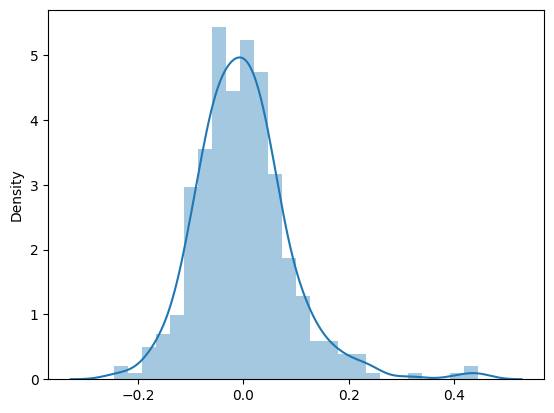

In [156]:
#visualizing residual

res = y_train - y_train_pred
sns.distplot(res)
plt.show()

Analysis of the residual -

It shows a normal distribution
The distribution is centered around 0.
Thus the fundamental assumptions of linear regression

# Prediction on Test Set

In [157]:
#scaling

num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [158]:
df_test.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,0.263176,0.298548,0.408537,0.158537,0.268293,0.865854,0.195122,0.347561,0.030488,0.353659,0.205285,0.237805,0.420732,0.329268
std,0.172077,0.211922,0.147537,0.281081,0.276007,0.341853,0.397508,0.477654,0.172452,0.479569,0.289322,0.427043,0.495189,0.471387
min,0.006061,-0.016367,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142424,0.148011,0.400000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.226061,0.259724,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.346970,0.397439,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,0.909091,1.263992,0.800000,1.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Creating X and y test set

In [159]:
y_test = df_test.pop('price')
X_test = df_test

In [160]:
# Adding constant variable to test dataframe

X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,1.0,0.091869,0.4,0.0,0.333333,1,0,0,0,0,0.000000,1,1,0
54,1.0,0.366420,0.4,0.5,0.333333,1,1,0,0,1,0.333333,0,1,0
171,1.0,0.742080,0.4,0.0,0.000000,1,0,0,0,0,0.333333,1,1,0
244,1.0,0.306582,0.4,0.0,0.333333,1,1,1,0,0,0.000000,1,1,0
268,1.0,0.274023,0.6,0.0,0.333333,1,0,0,0,1,0.000000,0,1,0


In [161]:
#removing variables that were removed from the model

X_test_sm = X_test_sm.drop(['bedrooms', 'basement',"semi-furnished"], axis=1)

In [162]:
#Making predictions on the final model

y_test_pred = lr_model4.predict(X_test_sm)

# Model Evaluation

Text(0, 0.5, 'y_pred')

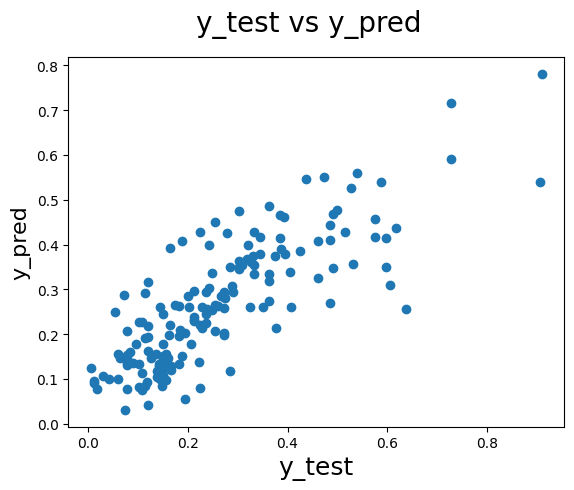

In [165]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16)

In [168]:
#checking the co-efficients

lr_model4.params

,0
const,0.042792
area,0.233517
bathrooms,0.201857
stories,0.108139
mainroad,0.049672
guestroom,0.040198
hotwaterheating,0.087618
airconditioning,0.068221
parking,0.062854
prefarea,0.063745


We can see that the equation of our best fitted line is:

price = 0.236×area + 0.202×bathrooms + 0.11×stories + 0.05×mainroad + 0.04×guestroom + 0.0876×hotwaterheating + 0.0682×airconditioning + 0.0629×parking +0.0637×prefarea − 0.0337×unfurnished



In [167]:
#Checking R-squared

print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))

0.6759630668130594
0.660134403021964


# Conclusion

The training model achieved an R² value of 0.67, while the test model achieved an R² value of 0.66. This small variance of less than 5% indicates that the model is robust and performs well on unseen data. Therefore, the model is capable of making accurate predictions for new, unseen datasets, ensuring reliable forecasting.